In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
titanic=pd.read_csv(r"C:\Users\DELL\Downloads\titanic_dataset.csv")

In [109]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
titanic.shape

(891, 12)

Making PassengerId as the index column and checking the basic details of the data.

In [111]:
titanic=pd.read_csv(r"C:\Users\DELL\Downloads\titanic_dataset.csv",index_col='PassengerId')

In [112]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
titanic.shape

(891, 11)

In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [115]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking for the null values

In [116]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

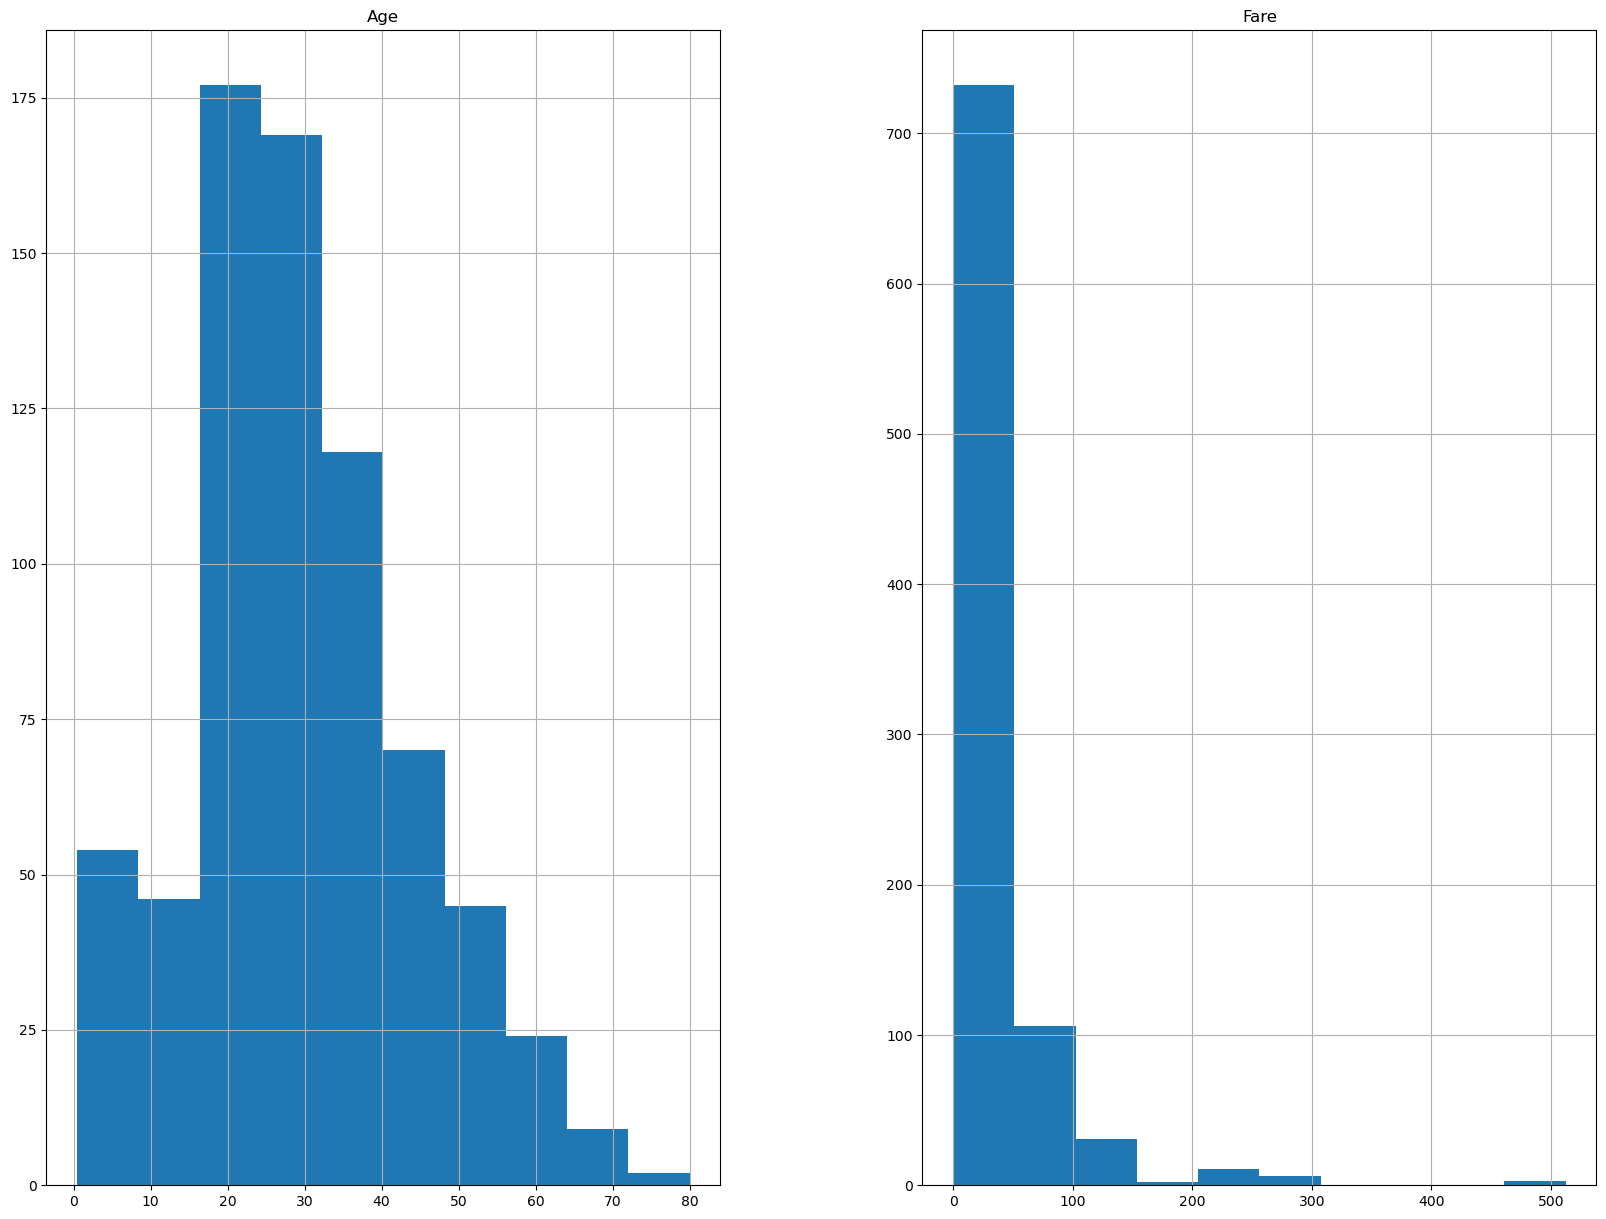

In [117]:
freq_graph=titanic.select_dtypes(include=['float'])
freq_graph.hist(figsize=(20,15))
plt.show()

In [118]:
titanic['Age'].mean()

29.69911764705882

In [119]:
titanic['Age'].median()

28.0

In [120]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [121]:
titanic['Age'].isna().sum()

0

In [122]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Filled the NaN values in Age using median value.Since,the Age  follows a skewed distribution,median is used to fill NaN values.

In [123]:
titanic.shape

(891, 11)

In [124]:
del titanic['Cabin']

In [125]:
titanic.shape

(891, 10)

In [126]:
titanic=titanic.dropna(axis=0)

In [127]:
titanic.shape

(889, 10)

Removed the column 'Cabin' which had 687 NaN values and deleted two rows which had NaN values in column 'Embarked'.

In [128]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

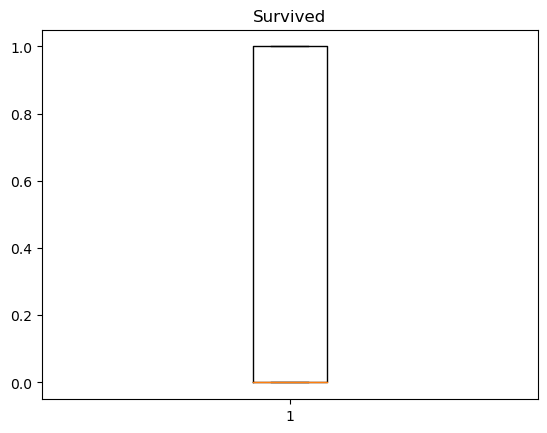

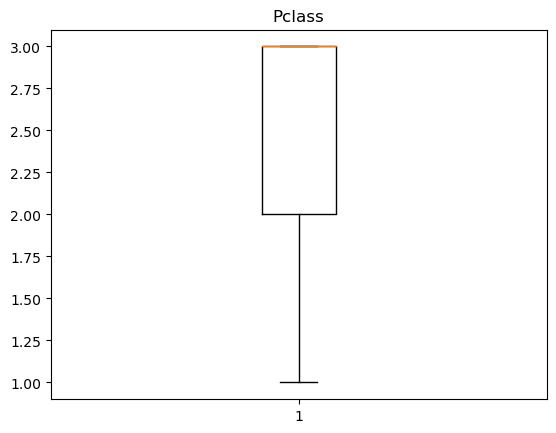

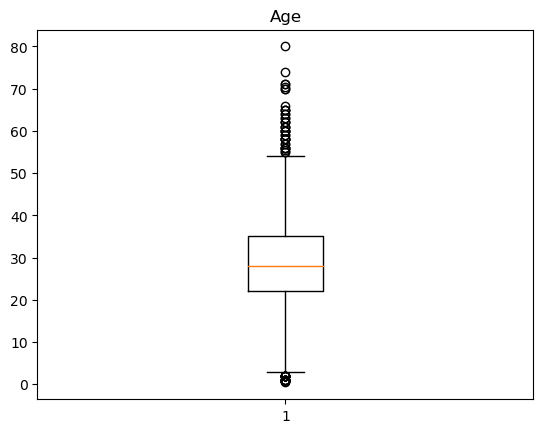

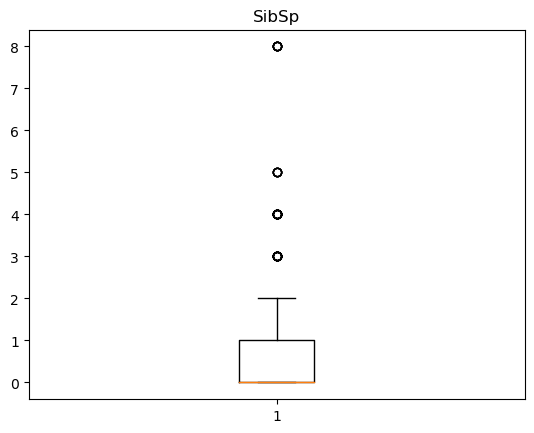

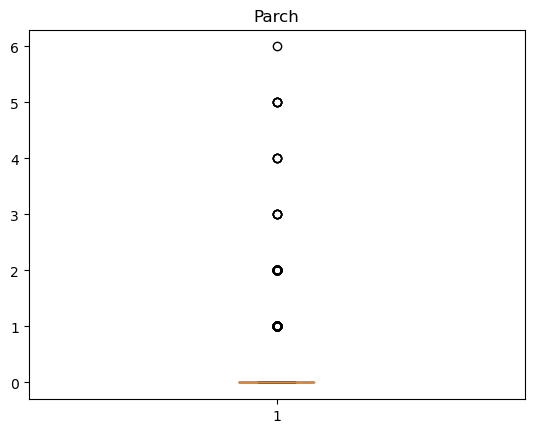

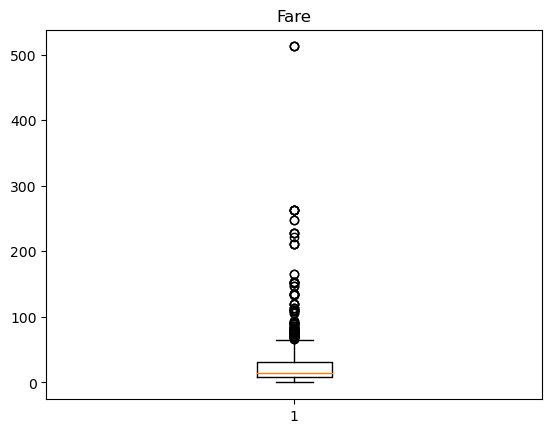

In [129]:
num_cols=['Survived', 'Pclass','Age', 'SibSp', 'Parch','Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(titanic[i])
    plt.title(i)

Here,we can see that the columns Age,SibSp,Parch and Fare has outlier values.

In [130]:
Q1=np.percentile(titanic['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic['Age'],75,interpolation='midpoint')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\2514094379.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(titanic['Age'],25,interpolation='midpoint')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\2514094379.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(titanic['Age'],50,interpolation='midpoint')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2596\2514094379.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or

In [131]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [132]:
IQR=Q3-Q1

In [133]:
print(IQR)

13.0


In [134]:
titanic['Age'].median()

28.0

In [135]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR
print(up_lim)
print(low_lim)

54.5
2.5


In [136]:
outliers=[]
for x in titanic['Age']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [137]:
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0, 56.0]


In [138]:
ind1=titanic['Age']>up_lim
titanic.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],
           dtype='int64', name='PassengerId')

In [139]:
ind2=titanic['Age']<low_lim
titanic.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [140]:
titanic.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26160df2f50>,
 'caps': [<matplotlib.lines.Line2D at 0x26160df3280>,
 'boxes': [<matplotlib.lines.Line2D at 0x26160df2ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x26160df39a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26160df3bb0>],
 'means': []}

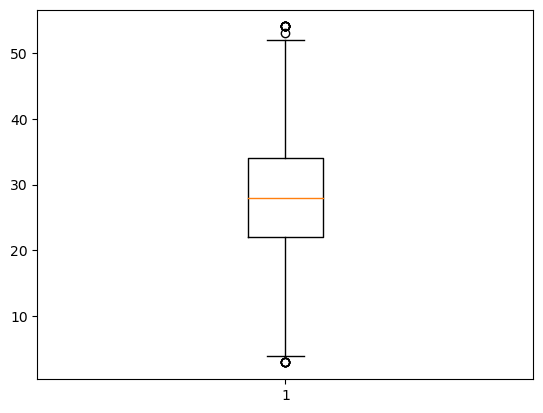

In [156]:
plt.boxplot(titanic['Age'])

We can see that the outliers are handled.